In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs 

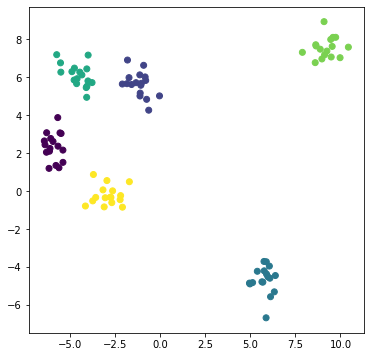

In [3]:
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6) #聚类之间的标准差
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1], c=y)


In [13]:
from scipy.spatial.distance import cdist
class Kmeans(object):
    def __init__(self,n_clusters=6,max_iter=300,centroids=[]):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=np.array(centroids,dtype=float)

    def fit(self,data):
        #假如没有指定初始质心,随机选取data中的点，作为初始质心
        if(self.centroids.shape==(0,)):
            #从0,data.shape[0]随机生成self.n_clusters个行
            self.centroids = data[np.random.randint(0,data.shape[0],self.n_clusters),:]
        for i in range(self.max_iter):
            #1.计算距离，，2.对距离按由近到远排序，选取最近的质心点的类别，作为当前节点的分类,3.对于每一类进行均值计算，更新质心坐标
            # 得到的是100*6的矩阵,每一行表示某个节点与6个质心的距离向量
            distances = cdist(data,self.centroids)
            c_ind = np.argmin(distances,axis=1)
            
            for i in range(self.n_clusters):
                #排除掉没有出现在c_ind里面的类别
                if i in c_ind:
                    # 选出所有类别是i的点，取data里面坐标的均值，更新第i个质心
                    self.centroids[i] = np.mean(data[c_ind==i], axis=0) #c_ind==i判断数组中的每一个元素是否等于i，c_ind是一个数组，c_ind==i返回一个数组，bool索引。
    def predict(self,samples):
        #跟上面一样，计算距离，选取最近的那个质心的类别
        distances = cdist(samples,self.centroids)
        c_ind = np.argmin(distances,axis=1)
        return c_ind


[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]
[1 5]


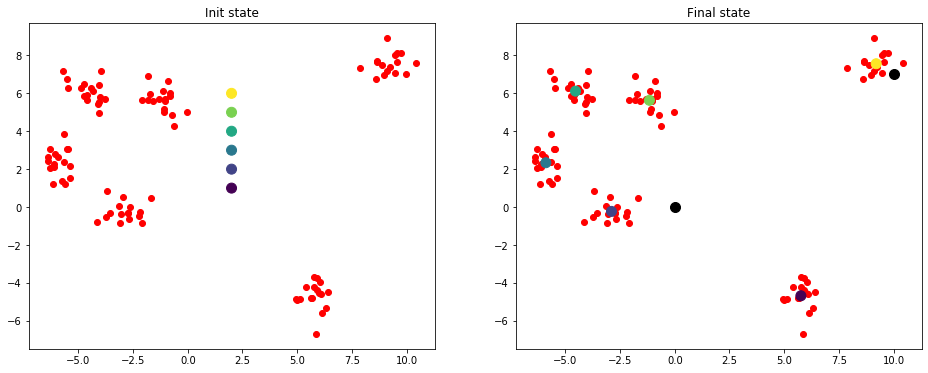

In [17]:
def plotkmeans(x,y,centroids,subplot,title):
    #分配子图
    plt.subplot(subplot)
    plt.scatter(x[:,0],x[:,1],c="r")
    plt.scatter(centroids[:,0],centroids[:,1],c=np.array(range(6)),s=100)#s=100 size
    plt.title(title)

kmeans = Kmeans(max_iter=300,centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))
plt.figure(figsize=(16,6))
plotkmeans(x,y,kmeans.centroids,121,"Init state")
kmeans.fit(x)
plotkmeans(x,y,kmeans.centroids,122,"Final state")

x_new = np.array([[0,0],[10,7]])
y_pred = kmeans.predict(x_new)
print(kmeans.centroids)
print(y_pred)
plt.scatter(x_new[:,0],x_new[:,1],s=100,c="black")